## SD-Turbo

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
device = torch.device("cuda:1")
pipe.to(device)


/opt/conda/envs/diffusers/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  8.20it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.1",
  "_name_or_path": "stabilityai/sd-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [39]:

prompt = "a photo of a black car, positioned in middle"

images = []
for i in range(100):
    image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0, seed=i).images[0]
    images.append(image)
    
    

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 31.34it/s]


In [40]:
images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=51

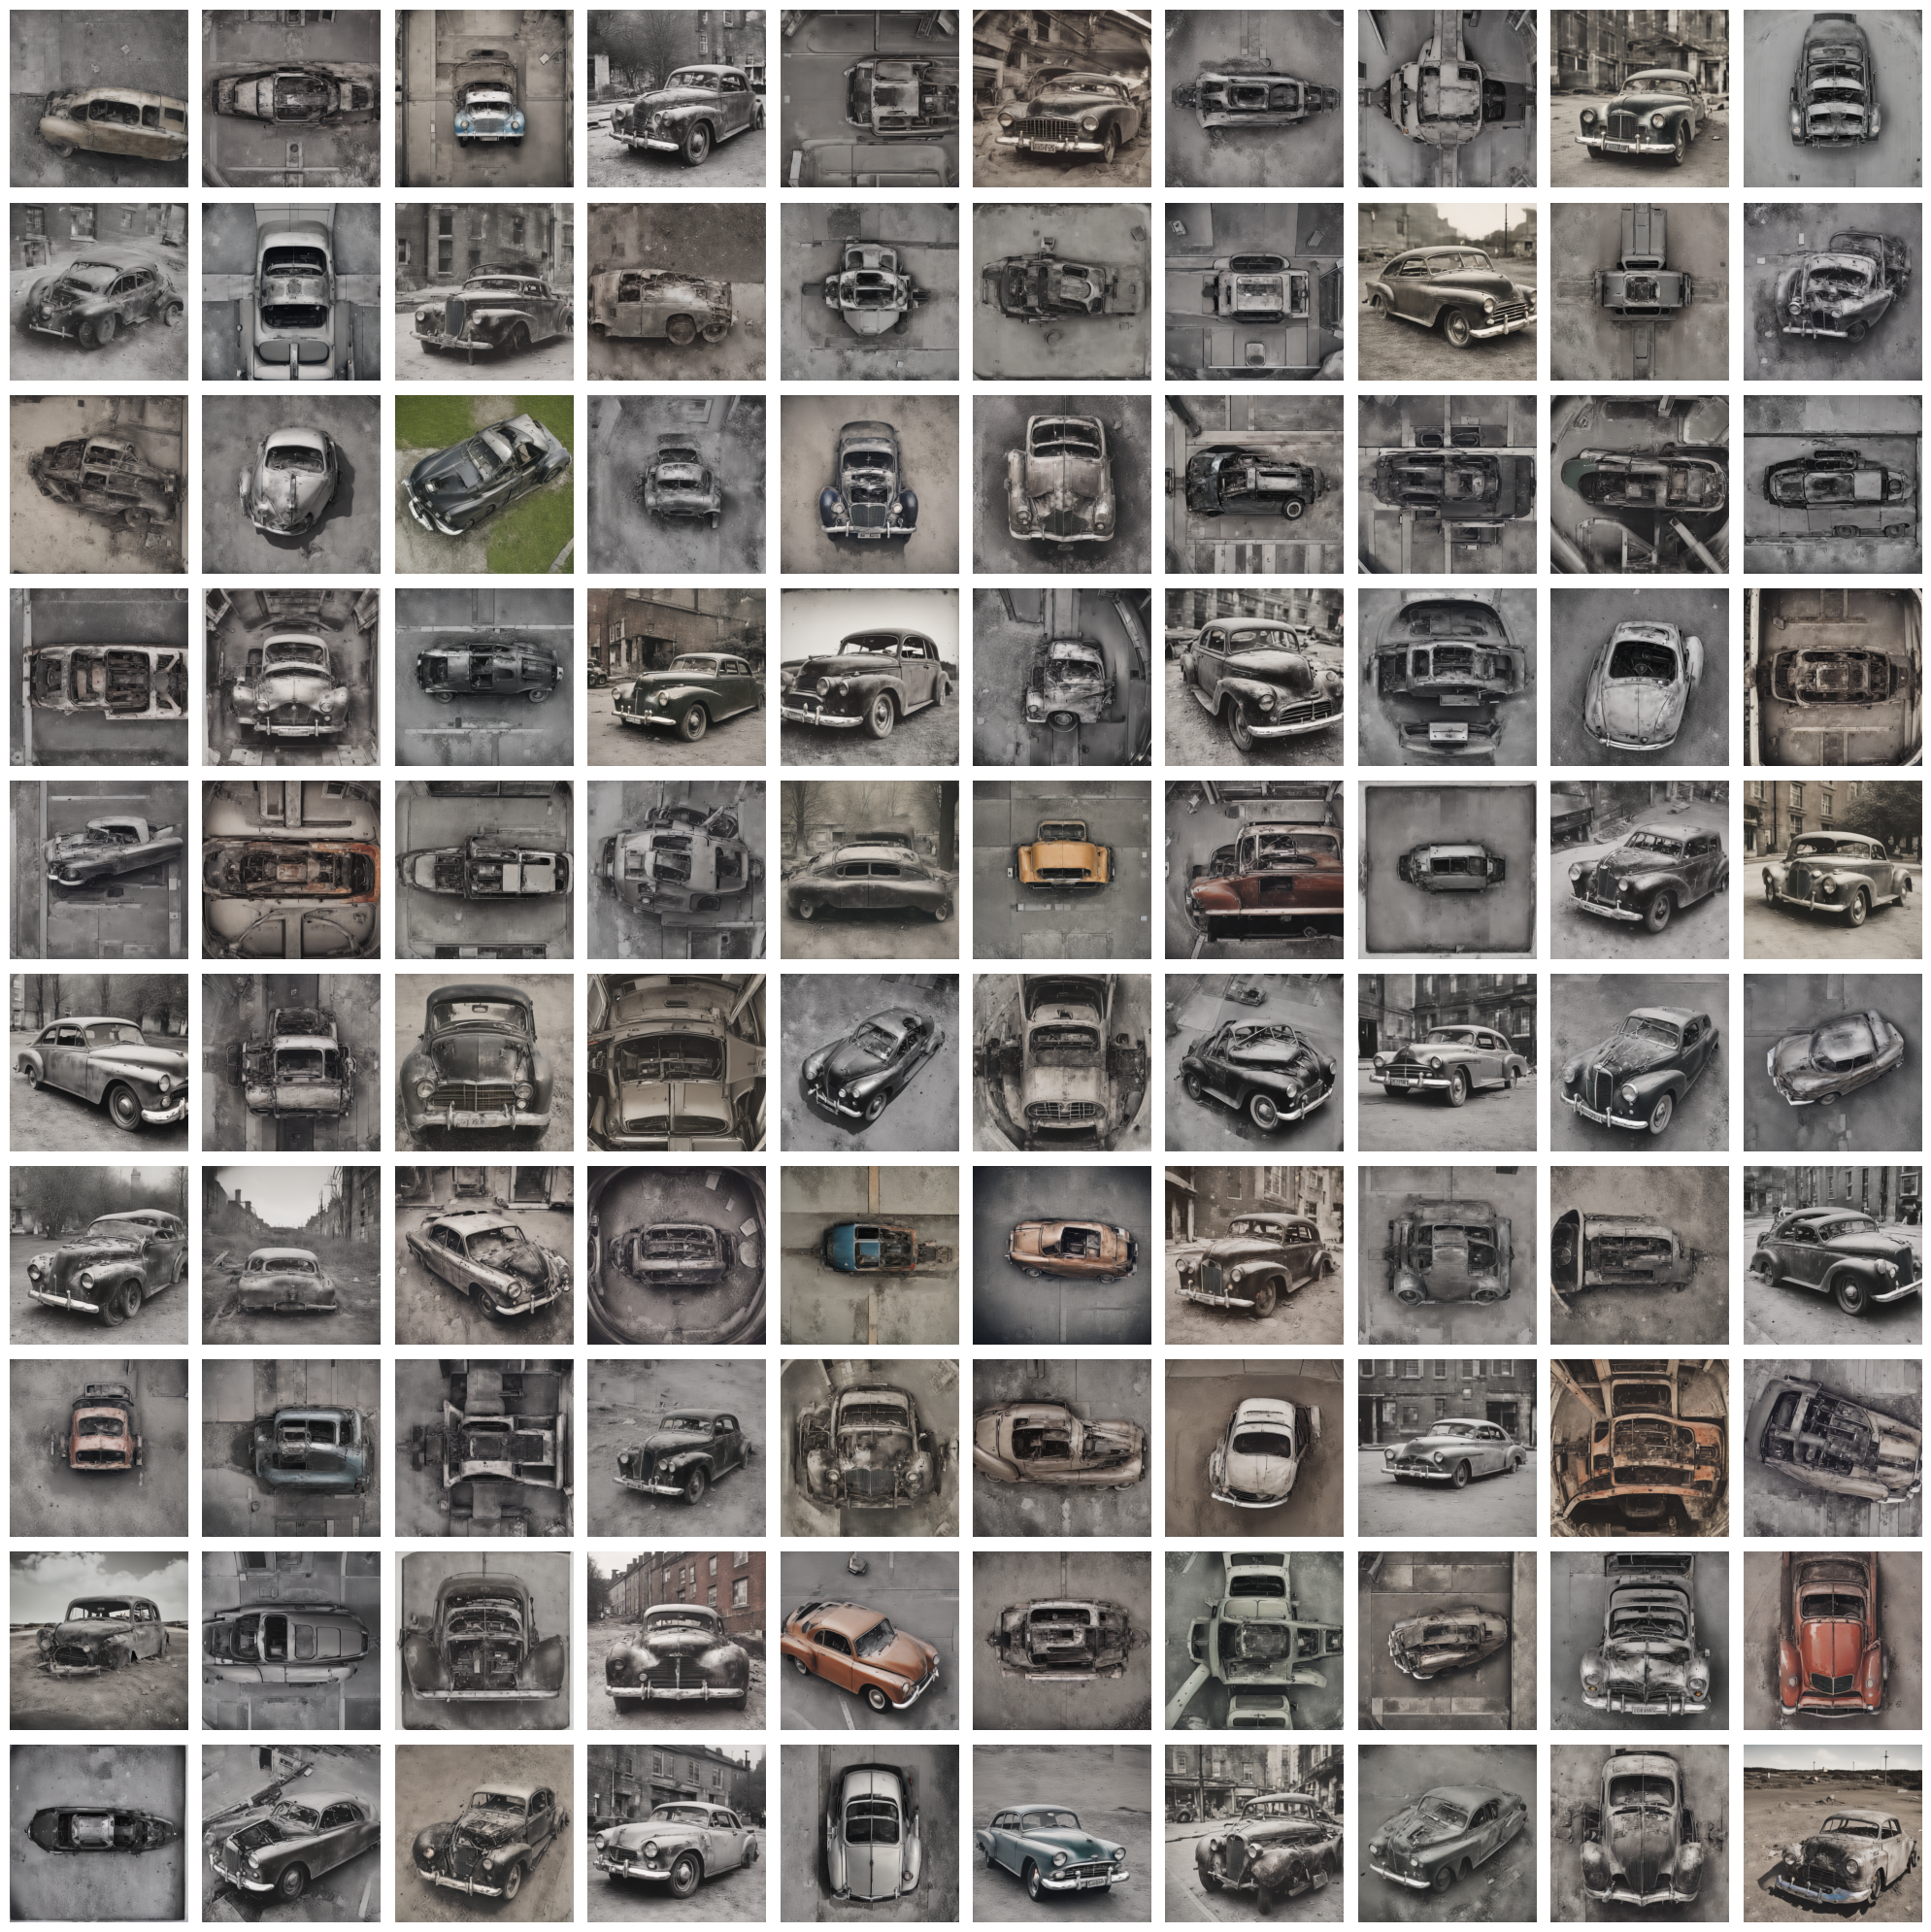

In [41]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(10, 10, figsize=(20, 20))    

for i, ax in enumerate(ax.flatten()):  # ax.flatten()을 사용하여 1D 리스트로 접근
    ax.imshow(images[i])
    ax.axis("off")

plt.tight_layout()
plt.show()
fig.savefig(f"output_{prompt}.png")
    


## FLUX-schnell

In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16)

prompt = "A cat holding a sign that says hello world"
out = pipe(
    prompt=prompt,
    guidance_scale=0.,
    height=512,
    width=512,
    num_inference_steps=1,
    max_sequence_length=256,
).images[0]

/opt/conda/envs/reno/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 23 files:  17%|█▋        | 4/23 [00:32<03:00,  9.48s/it]Error while downloading from https://cdn-lfs-us-1.hf.co/repos/61/ba/61ba075249a6755dc3e602ba82772c47ebb1fdb830c67e7f00e4d408868518f1/58b4434078f0c2567ddc54e3b5cbf39626ab55fbd9d5c22956e183668f535dec?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27diffusion_pytorch_model-00002-of-00003.safetensors%3B+filename%3D%22diffusion_pytorch_model-00002-of-00003.safetensors%22%3B&Expires=1738993815&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczODk5MzgxNX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzYxL2JhLzYxYmEwNzUyNDlhNjc1NWRjM2U2MDJiYTgyNzcyYzQ3ZWJiMWZkYjgzMGM2N2U3ZjAwZTRkNDA4ODY4NTE4ZjEvNThiNDQzNDA3OGYwY